In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI,GoogleGenerativeAI
from langchain_core.messages import SystemMessage,HumanMessage,BaseMessage
# it store it in the ram (data)
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph import StateGraph,START,END
from typing import TypedDict, List,Annotated
from pydantic import BaseModel,Field
from dotenv import load_dotenv
import operator


load_dotenv()

True

In [3]:
model = ChatGoogleGenerativeAI(model = "gemini-1.5-flash")

In [4]:
class jokeState(TypedDict):
    topic:str
    joke:str
    explaination:str


In [5]:
def generate_joke(state:jokeState):
    pmt = f'generate a joke on the topic {state['topic']}'

    ans = model.invoke(pmt).content

    return {'joke':ans}

def joke_explaination(state:jokeState):
    pmt = f'write a explaination to this joke {state["joke"]}'
    ans = model.invoke(pmt).content

    return {'explaination':ans}

In [6]:
graph = StateGraph(jokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('joke_explaination',joke_explaination)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','joke_explaination')
graph.add_edge('joke_explaination',END)

checkpointer = InMemorySaver()

bot = graph.compile(checkpointer=checkpointer)



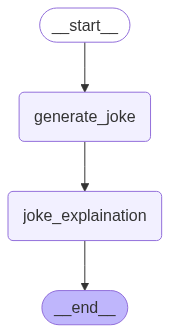

In [7]:
bot

In [8]:
thread_id = "1"
config1 = {"configurable":{"thread_id":thread_id}}

initial_state = {
    'topic':'pizza'
}

bot.invoke(initial_state,config=config1)

{'topic': 'pizza',
 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!",
 'explaination': 'This joke relies on a pun, using the similar-sounding words "fungi" and "fun guy."\n\n* **Fungi:**  This is the plural of "fungus," a type of organism like mushrooms.\n* **Fun guy:** This is a phrase meaning "a fun person."\n\nThe joke plays on the double meaning of "fungi."  The pizza slice (presumably made with mushrooms) "likes" the mushroom because it\'s a "fungi"—a type of mushroom—but it also sounds like the pizza slice likes the mushroom because it\'s a "fun guy," implying the mushroom is a pleasant and enjoyable companion.'}

In [9]:
thread_id = "2"
config2 = {"configurable":{"thread_id":thread_id}}

initial_state = {
    'topic':'pasta'
}

bot.invoke(initial_state,config=config2)

{'topic': 'pasta',
 'joke': "Why did the Italian chef quit his job?  Because he didn't get enough *pasta*bilities!",
 'explaination': 'The joke plays on the similar sounds of "pasta" and "possibilities."  The chef quit because he felt his job didn\'t offer him enough opportunities ("possibilities") for creativity or advancement.  The word "pasta" is used humorously to replace "possibilities," creating a pun.'}

In [10]:
# to get the chat history till now
bot.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!", 'explaination': 'This joke relies on a pun, using the similar-sounding words "fungi" and "fun guy."\n\n* **Fungi:**  This is the plural of "fungus," a type of organism like mushrooms.\n* **Fun guy:** This is a phrase meaning "a fun person."\n\nThe joke plays on the double meaning of "fungi."  The pizza slice (presumably made with mushrooms) "likes" the mushroom because it\'s a "fungi"—a type of mushroom—but it also sounds like the pizza slice likes the mushroom because it\'s a "fun guy," implying the mushroom is a pleasant and enjoyable companion.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0722a2-2cab-62c2-8002-28f14e7cbd9d'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-05T18:29:34.638724+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_n

In [11]:
bot.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the Italian chef quit his job?  Because he didn't get enough *pasta*bilities!", 'explaination': 'The joke plays on the similar sounds of "pasta" and "possibilities."  The chef quit because he felt his job didn\'t offer him enough opportunities ("possibilities") for creativity or advancement.  The word "pasta" is used humorously to replace "possibilities," creating a pun.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0722a2-539d-60f6-8002-dbb24dc24c51'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-05T18:29:38.722389+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0722a2-4ace-61fa-8001-ccd74d209837'}}, tasks=(), interrupts=())

In [12]:
list(bot.get_state_history(config1))
# list(bot.get_state_history(config2))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!", 'explaination': 'This joke relies on a pun, using the similar-sounding words "fungi" and "fun guy."\n\n* **Fungi:**  This is the plural of "fungus," a type of organism like mushrooms.\n* **Fun guy:** This is a phrase meaning "a fun person."\n\nThe joke plays on the double meaning of "fungi."  The pizza slice (presumably made with mushrooms) "likes" the mushroom because it\'s a "fungi"—a type of mushroom—but it also sounds like the pizza slice likes the mushroom because it\'s a "fun guy," implying the mushroom is a pleasant and enjoyable companion.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0722a2-2cab-62c2-8002-28f14e7cbd9d'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-05T18:29:34.638724+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_

In [13]:
# Time travel

In [25]:
# 1f0722a2-0c95-6820-8000-a36fe77620c6
bot.get_state({'configurable':{'thread_id':"1",'checkpoint_id':'1f0722a2-0c95-6820-8000-a36fe77620c6'}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0722a2-0c95-6820-8000-a36fe77620c6'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-05T18:29:31.274434+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0722a2-0c93-6214-bfff-a725a6b84c42'}}, tasks=(PregelTask(id='8c2eb3f4-4e21-1e03-2a70-fff4e778d98e', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!"}),), interrupts=())

In [28]:
bot.invoke(None,{
    "configurable": {
        "thread_id": "1",
        "checkpoint_id": "1f0722a2-0c95-6820-8000-a36fe77620c6"
    }
})



{'topic': 'pizza',
 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!",
 'explaination': 'This is a pun, relying on the similar sounds of two words with different meanings.\n\n* **Fungi:**  Refers to a kingdom of living organisms (mushrooms are fungi).\n* **Funny:** Means humorous or amusing.\n\nThe joke plays on the similar pronunciation of "fungi" and "funny."  The pizza slice likes the mushroom because the mushroom is a type of fungi, and that\'s considered "funny" (humorous) in the context of the joke.  It\'s a simple, silly wordplay.'}

In [29]:
list(bot.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!", 'explaination': 'This is a pun, relying on the similar sounds of two words with different meanings.\n\n* **Fungi:**  Refers to a kingdom of living organisms (mushrooms are fungi).\n* **Funny:** Means humorous or amusing.\n\nThe joke plays on the similar pronunciation of "fungi" and "funny."  The pizza slice likes the mushroom because the mushroom is a type of fungi, and that\'s considered "funny" (humorous) in the context of the joke.  It\'s a simple, silly wordplay.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0722c2-b320-6a76-8002-fd6a89139187'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-05T18:44:07.731218+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0722c2-95d9-6a80-8001-3280c57e1446'}}, tasks=(), inte

In [30]:
# Updating the State

In [40]:
bot.update_state(
    {
        "configurable":
        {
            "thread_id": "1",
            "checkpoint_id": "1f0722a2-0c95-6820-8000-a36fe77620c6",
            "checkpoint_ns": ""
        }
    },
    {
        "topic": "samosa"
    }
)


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0722e5-6f77-6946-8001-80155bdc502f'}}

In [41]:
list(bot.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0722e5-6f77-6946-8001-80155bdc502f'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-05T18:59:40.160619+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0722a2-0c95-6820-8000-a36fe77620c6'}}, tasks=(PregelTask(id='d4b84a2c-9891-e314-a8da-072ace88eead', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': "Why does the pizza slice like the mushroom so much?\n\nBecause he's a fungi!", 'explaination': 'This joke is a pun, playing on the similar sounds of "fungi" and "fun guy".\n\n* **Fungi:**  This refers to the kingdom of living organisms that includes mushrooms, molds, and yeasts.\n\n* **Fun guy:** This is a phra

In [42]:
bot.invoke(None,{
    "configurable": {
        "thread_id": "1",
        "checkpoint_id": "1f0722e5-6f77-6946-8001-80155bdc502f"
    }
})



{'topic': 'samosa',
 'joke': 'Why did the samosa get a promotion?  Because it was well-seasoned and had great *filling* potential!',
 'explaination': 'This joke is a pun, using the word "filling" in two different ways.\n\n* **Literal meaning:**  A samosa is a savory pastry filled with potatoes, peas, and spices.  The joke plays on the fact that a good samosa has a delicious and ample filling.\n\n* **Figurative meaning:**  In a work context, "filling a position" or having "filling potential" refers to someone\'s ability to successfully complete tasks and contribute to the company.  The joke suggests the samosa\'s "filling" (in the food sense) is analogous to its potential to excel in a job.\n\nTherefore, the humor comes from the unexpected double meaning of "filling," cleverly linking the deliciousness of a well-made samosa to its hypothetical suitability for a promotion.  The "well-seasoned" part further emphasizes the positive qualities of the samosa, both as food and as a prospective

In [43]:
list(bot.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa get a promotion?  Because it was well-seasoned and had great *filling* potential!', 'explaination': 'This joke is a pun, using the word "filling" in two different ways.\n\n* **Literal meaning:**  A samosa is a savory pastry filled with potatoes, peas, and spices.  The joke plays on the fact that a good samosa has a delicious and ample filling.\n\n* **Figurative meaning:**  In a work context, "filling a position" or having "filling potential" refers to someone\'s ability to successfully complete tasks and contribute to the company.  The joke suggests the samosa\'s "filling" (in the food sense) is analogous to its potential to excel in a job.\n\nTherefore, the humor comes from the unexpected double meaning of "filling," cleverly linking the deliciousness of a well-made samosa to its hypothetical suitability for a promotion.  The "well-seasoned" part further emphasizes the positive qualities of the samosa, both as food 